# Creating a Regression Model For Boston Housing Price

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import pandas as pd

In [2]:
boston_house_data=pd.read_csv('https://raw.githubusercontent.com/JayantArsode/Machine_Learning/Machine-Learning/House-Prices-Advanced-Regression-Techniques/Boston_House_Price_Dataset_Files/train.csv')
boston_house_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### Getting Data Description

In [3]:
import requests
url = 'https://raw.githubusercontent.com/JayantArsode/Machine_Learning/Machine-Learning/House-Prices-Advanced-Regression-Techniques/Boston_House_Price_Dataset_Files/data_description.txt'
boston_house_variable_decs = requests.get(url)
print (boston_house_variable_decs.text)

MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM

In [4]:
# Looking for variable information
boston_house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

## Dropping columns with too much null values and Unwanted Columns
Columns|Not-Null Count
-----|-----
Id|1460 non-null
Alley|91 non-null
FireplaceQu|770 non-null
PoolQC|7 non-null
Fence|281 non-null
MiscFeature|54 non-null

In [5]:
boston_house_data.drop(columns=['Id','Alley','FireplaceQu','PoolQC','Fence','MiscFeature'],inplace=True)
boston_house_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000


### Getting Numerical And Categorical Columns Seprate

In [6]:
# Now seprating int, float,categorical columns in data
numerical_columns=boston_house_data.select_dtypes(include=['float64','int64']).columns
categorical_columns=boston_house_data.select_dtypes(include='object').columns
print(f'Numerical columns names: {numerical_columns}\nCategoricla Column Names: {categorical_columns}')

Numerical columns names: Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')
Categoricla Column Names: Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',

### Getting Correlation between Features And Target Variable(SalePrice)

In [7]:
boston_house_data[numerical_columns].corr()['SalePrice'][:]

MSSubClass      -0.084284
LotFrontage      0.351799
LotArea          0.263843
OverallQual      0.790982
OverallCond     -0.077856
YearBuilt        0.522897
YearRemodAdd     0.507101
MasVnrArea       0.477493
BsmtFinSF1       0.386420
BsmtFinSF2      -0.011378
BsmtUnfSF        0.214479
TotalBsmtSF      0.613581
1stFlrSF         0.605852
2ndFlrSF         0.319334
LowQualFinSF    -0.025606
GrLivArea        0.708624
BsmtFullBath     0.227122
BsmtHalfBath    -0.016844
FullBath         0.560664
HalfBath         0.284108
BedroomAbvGr     0.168213
KitchenAbvGr    -0.135907
TotRmsAbvGrd     0.533723
Fireplaces       0.466929
GarageYrBlt      0.486362
GarageCars       0.640409
GarageArea       0.623431
WoodDeckSF       0.324413
OpenPorchSF      0.315856
EnclosedPorch   -0.128578
3SsnPorch        0.044584
ScreenPorch      0.111447
PoolArea         0.092404
MiscVal         -0.021190
MoSold           0.046432
YrSold          -0.028923
SalePrice        1.000000
Name: SalePrice, dtype: float64

### From Above We Can Conclude That

Features | Correlation-Coefficient
---- | -----
**OverallQual**|0.783546
**YearBuilt**|0.504297
**YearRemodAdd**|0.501435
**MasVnrArea**|0.465811
**TotalBsmtSF**|0.602042
**1stFlrSF**|0.604714
**GrLivArea**|0.711706
**FullBath**|0.569313
**Fireplaces**|0.445434
**GarageYrBlt**|0.481730
**TotRmsAbvGrd**|0.551821
**GarageCars**|0.640154
**GarageArea**|0.607535

<h4> Are highly corelated to the Target Variable SalePrice <h4>

### Selecting Highly Correlated Features

In [8]:
boston_house_data_selected_columns=['OverallQual','YearBuilt','YearRemodAdd','MasVnrArea','TotalBsmtSF','1stFlrSF','GrLivArea','Fireplaces'\
                                    ,'FullBath','GarageYrBlt','TotRmsAbvGrd','GarageCars','GarageArea','SalePrice']+categorical_columns.tolist()
boston_house_data_selected=boston_house_data[boston_house_data_selected_columns].copy()
boston_house_data_selected.head()

,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,TotalBsmtSF,1stFlrSF,GrLivArea,Fireplaces,FullBath,GarageYrBlt,...,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,7,2003,2003,196.0,856,856,1710,0,2,2003.0,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
1,6,1976,1976,0.0,1262,1262,1262,1,2,1976.0,...,SBrkr,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
2,7,2001,2002,162.0,920,920,1786,1,2,2001.0,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
3,7,1915,1970,0.0,756,961,1717,1,1,1998.0,...,SBrkr,Gd,Typ,Detchd,Unf,TA,TA,Y,WD,Abnorml
4,8,2000,2000,350.0,1145,1145,2198,1,2,2000.0,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal


### Updating Numerical_Columns

In [9]:
# Now seprating int, float,categorical columns in data
numerical_columns=boston_house_data_selected.select_dtypes(include=['float64','int64']).columns
print(f'Numerical columns names: {numerical_columns}')

Numerical columns names: Index(['OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'TotalBsmtSF',
       '1stFlrSF', 'GrLivArea', 'Fireplaces', 'FullBath', 'GarageYrBlt',
       'TotRmsAbvGrd', 'GarageCars', 'GarageArea', 'SalePrice'],
      dtype='object')


### Creating Data Preprocessing Function
> Replace Numerical Columns Nan Values With Median

> Impute the Categorial Columns With Most Frequent Startegy

In [10]:
def data_preprocesses(data,
                      numerical_columns=numerical_columns,
                      categorical_columns=categorical_columns):
  '''This function will impute the nan values in numerical and categorical columns and return dataframe'''

  # Imputing the numerical columns
  data[numerical_columns] = data[numerical_columns].fillna(data[numerical_columns].median().iloc[0])

  # Imputing the categorical columns
  data[categorical_columns] = data[categorical_columns].fillna(data[categorical_columns].mode().iloc[0])

  return data

### Preprocessing Boston Housin Data Selected

In [11]:
boston_house_data_selected=data_preprocesses(boston_house_data_selected)

In [12]:
boston_house_data_selected.columns[boston_house_data_selected.isna().any()]

Index([], dtype='object')

In [13]:
boston_house_data_selected.columns

Index(['OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'TotalBsmtSF',
       '1stFlrSF', 'GrLivArea', 'Fireplaces', 'FullBath', 'GarageYrBlt',
       'TotRmsAbvGrd', 'GarageCars', 'GarageArea', 'SalePrice', 'MSZoning',
       'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd',
       'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional',
       'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive',
       'SaleType', 'SaleCondition'],
      dtype='object')

### Checking Distribution of All Numerical Columns

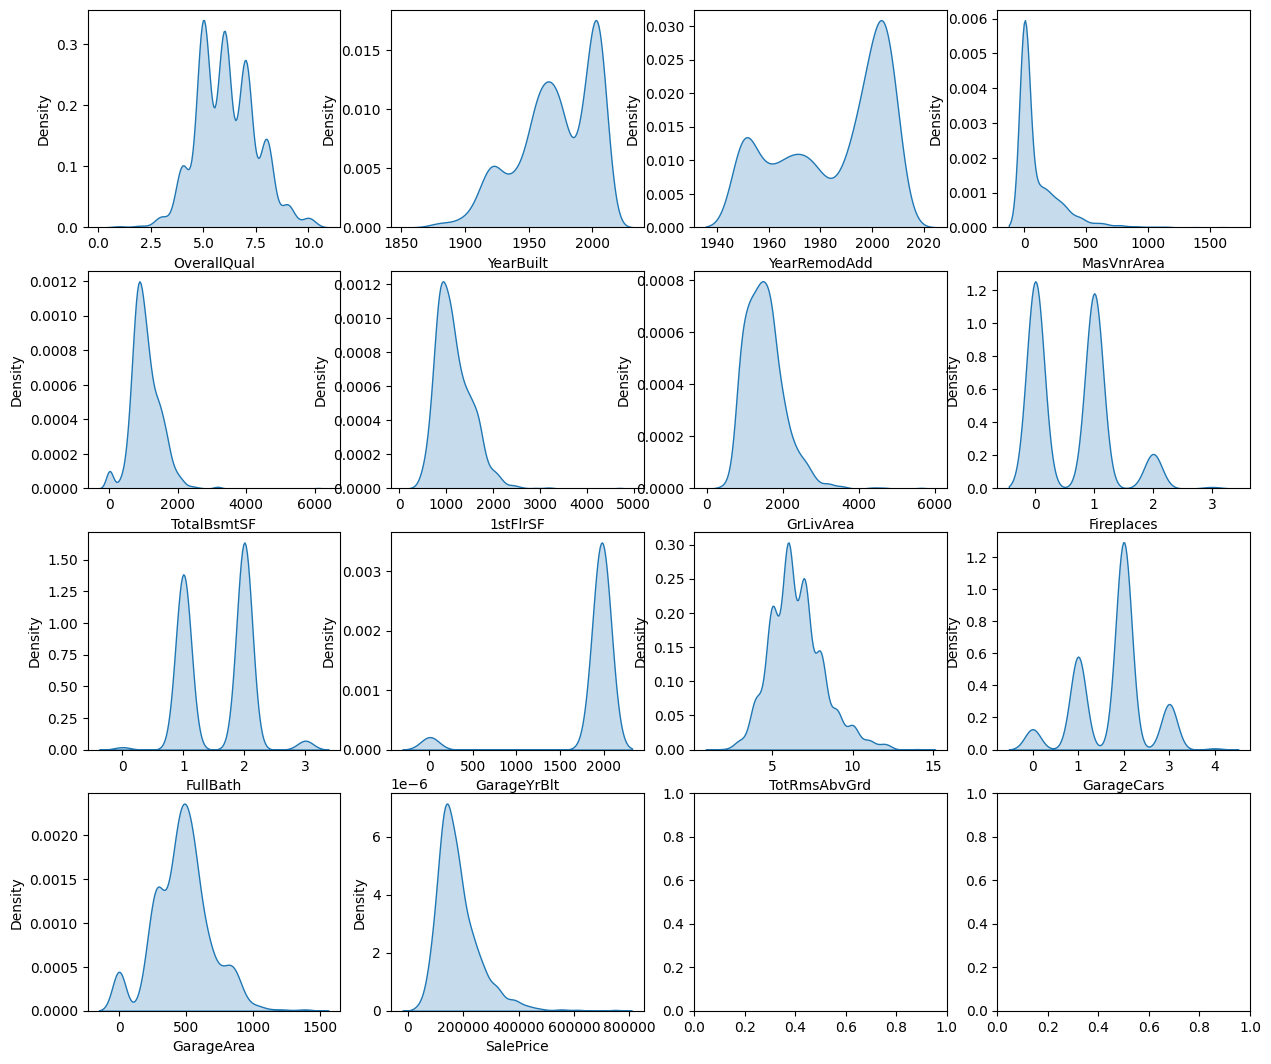

In [14]:
fig,ax=plt.subplots(4,4,figsize=(15,13))
ax=ax.ravel()
j=0
for i in numerical_columns:
  sns.kdeplot(x=boston_house_data_selected[i],ax=ax[j],fill=True)
  j+=1
plt.show()

### Checking for outliers using boxplots

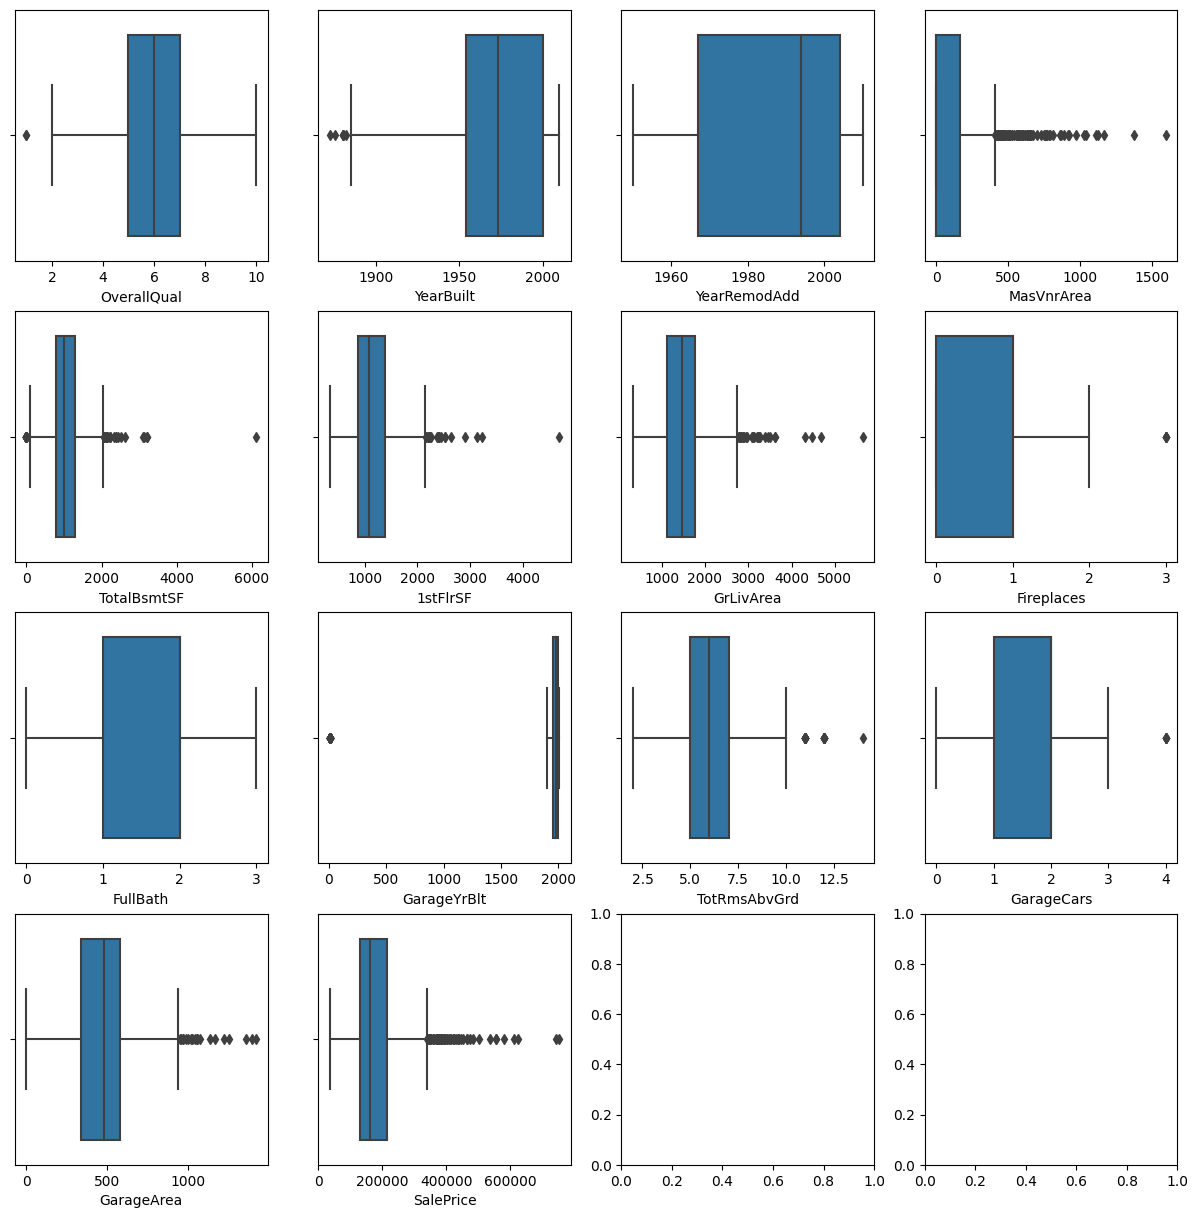

In [15]:
fig,ax=plt.subplots(4,4,figsize=(15,15))
ax=ax.ravel()
j=0
for i in numerical_columns:
  sns.boxplot(x=boston_house_data_selected[i],ax=ax[j])
  j+=1
plt.show()

### Creating a Column Transform To Preprocesses data:
> Scale Numerical Columns Using Standard Scaller To Reduce Effect Of Outliers.

> OneHot Encoding Data

In [16]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from mlxtend.preprocessing import DenseTransformer
from sklearn.impute import SimpleImputer
import numpy as np

In [17]:
# Assuming you have separate lists for numerical_columns and categorical_columns
ct = ColumnTransformer([
    ('numerical_scaling', StandardScaler(), numerical_columns[:13]),
    ('OneHotEncoding', OneHotEncoder(handle_unknown='ignore'), categorical_columns)
])

# Dividing dataset in features(X) vs labels(y)

X=boston_house_data_selected.drop(columns=['SalePrice'])
y=boston_house_data_selected['SalePrice']

### Train Test Spliting Data

In [18]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,shuffle=True,random_state=42)

In [19]:
X_train.shape,y_train.shape

((1168, 51), (1168,))

In [20]:
# Some global Variables
input_shape=124

### Now using PCA(Principal Component Analysis) To Reduce Dimensions Of Features

In [21]:
data_preprocessing_pipeline=Pipeline([
    ('column_transform',ct),
    ('to_dense',DenseTransformer()),
    ('pca',PCA(n_components=124))
])

## It is used to get number of components to retain for getting 99% variance of data
> <h3> Here it is 124 i.e number_components=124 <h3>

In [23]:
data_preprocessing_pipeline.fit(X_train)
# # Calculate the cumulative explained variance ratio
# pca=data_preprocessing_pipeline.named_steps['pca']
# cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)

# # Determine the number of components to retain (e.g., 95% variance)
# desired_variance = 0.99
# num_components = np.argmax(cumulative_variance_ratio >= desired_variance) + 1

# # Print the results
# print(f"Number of components to retain for {desired_variance * 100}% variance: {num_components}")

Pipeline(steps=[('column_transform',
                 ColumnTransformer(transformers=[('numerical_scaling',
                                                  StandardScaler(),
                                                  Index(['OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'TotalBsmtSF',
       '1stFlrSF', 'GrLivArea', 'Fireplaces', 'FullBath', 'GarageYrBlt',
       'TotRmsAbvGrd', 'GarageCars', 'GarageArea'],
      dtype='object')),
                                                 ('OneHotEncoding',
                                                  OneHotEncoder(handle_unknown='i...
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object'))])),
                ('to_dense', DenseTransformer()),
                ('pca', PCA(n_components=124))])

In [24]:
X_train_norm=data_preprocessing_pipeline.transform(X_train)
X_test_norm=data_preprocessing_pipeline.transform(X_test)

In [25]:
X_train_norm.shape

(1168, 124)

### Creating A Neural Network To Train Model

1. Creating a model with 2 hidden layer and 100 epochs
2. Creating a model with 2 hidden layer more than 100 epochs
3. Creating a model with 3 hidden layer and 100 epochs and more

### Model_1

In [52]:
# Setting Random Seed
tf.random.set_seed(42)

# 1. Creating Model
price_prediction_1=tf.keras.Sequential(name='price_prediction_1')
price_prediction_1.add(tf.keras.layers.Dense(100,input_shape=[input_shape],activation='relu',name='layer1',kernel_initializer=tf.keras.initializers.glorot_normal))
price_prediction_1.add(tf.keras.layers.Dense(50,activation='relu',name='layer2',kernel_initializer=tf.keras.initializers.glorot_normal))
price_prediction_1.add(tf.keras.layers.Dense(1,name='output_layer'))

# 2. Compile Model
price_prediction_1.compile(loss=tf.keras.losses.mae,
                           optimizer=tf.keras.optimizers.SGD(learning_rate=0.001),
                           metrics=['mae'])
# 3. Get model summary
price_prediction_1.summary()

Model: "price_prediction_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer1 (Dense)              (None, 100)               12500     
                                                                 
 layer2 (Dense)              (None, 50)                5050      
                                                                 
 output_layer (Dense)        (None, 1)                 51        
                                                                 
Total params: 17,601
Trainable params: 17,601
Non-trainable params: 0
_________________________________________________________________


In [53]:
history_1=price_prediction_1.fit(X_train_norm,y_train,epochs=100,verbose=1)

Epoch 1/100
37/37 [==============================] - 1s 2ms/step - loss: 181441.2812 - mae: 181441.2812
Epoch 2/100
37/37 [==============================] - 0s 3ms/step - loss: 181441.0156 - mae: 181441.0156
Epoch 3/100
37/37 [==============================] - 0s 2ms/step - loss: 181440.8125 - mae: 181440.8125
Epoch 4/100
37/37 [==============================] - 0s 2ms/step - loss: 181440.5000 - mae: 181440.5000
Epoch 5/100
37/37 [==============================] - 0s 2ms/step - loss: 181440.1719 - mae: 181440.1719
Epoch 6/100
37/37 [==============================] - 0s 2ms/step - loss: 181439.8281 - mae: 181439.8281
Epoch 7/100
37/37 [==============================] - 0s 2ms/step - loss: 181439.4062 - mae: 181439.4062
Epoch 8/100
37/37 [==============================] - 0s 2ms/step - loss: 181438.9062 - mae: 181438.9062
Epoch 9/100
37/37 [==============================] - 0s 2ms/step - loss: 181438.3281 - mae: 181438.3281
Epoch 10/100
37/37 [==============================] - 0s 2ms/ste

### Evaluating Model 1

In [54]:
price_prediction_1.evaluate(X_test_norm,y_test)

10/10 [==============================] - 0s 2ms/step - loss: 20038.4805 - mae: 20038.4805


[20038.48046875, 20038.48046875]

### Comparing First 20 samples

In [55]:
y_pred_1=price_prediction_1.predict(X_test_norm[:20])
print(f' True Price: {y_test[:20]}\nPredicted Price: {tf.squeeze(y_pred_1)}')

1/1 [==============================] - 0s 60ms/step
 True Price: 892     154500
1105    325000
413     115000
522     159000
1036    315500
614      75500
218     311500
1160    146000
649      84500
887     135500
576     145000
1252    130000
1061     81000
567     214000
1108    181000
1113    134500
168     183500
1102    135000
1120    118400
67      226000
Name: SalePrice, dtype: int64
Predicted Price: [159231.48 344066.2   93816.05 179850.98 371536.47  73792.11 246715.38
 155276.42  73804.92 117418.7  142879.56 123843.84 161553.4  232389.88
 169436.89 136351.77 179979.69 140464.47 140203.81 208532.66]


### Loos Curve

Text(0, 0.5, 'Loss')

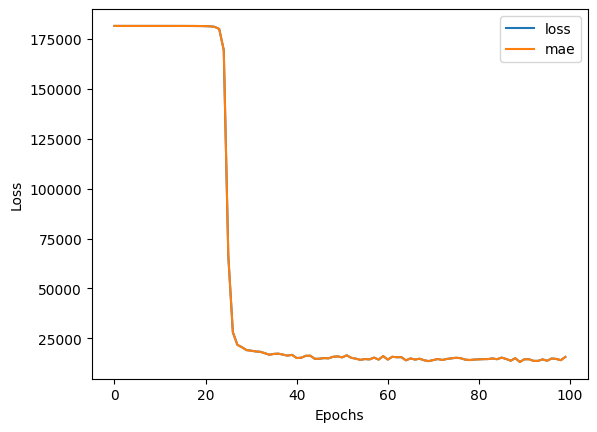

In [56]:
pd.DataFrame(history_1.history).plot()
plt.xlabel("Epochs")
plt.ylabel("Loss")

### Model_2

In [58]:
# Setting Random Seed
tf.random.set_seed(42)

# 1. Creating Model
price_prediction_2=tf.keras.Sequential(name='price_prediction_2')
price_prediction_2.add(tf.keras.layers.Dense(100,input_shape=[input_shape],activation='relu',name='layer1'))
price_prediction_2.add(tf.keras.layers.Dense(100,activation='relu',name='layer2'))
price_prediction_2.add(tf.keras.layers.Dense(1,name='output_layer'))

# 2. Compile Model
price_prediction_2.compile(loss=tf.keras.losses.mae,
                           optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                           metrics=['mae'])
# 3. Get model summary
price_prediction_2.summary()

Model: "price_prediction_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer1 (Dense)              (None, 100)               12500     
                                                                 
 layer2 (Dense)              (None, 100)               10100     
                                                                 
 output_layer (Dense)        (None, 1)                 101       
                                                                 
Total params: 22,701
Trainable params: 22,701
Non-trainable params: 0
_________________________________________________________________


In [59]:
history_2=price_prediction_2.fit(X_train_norm,y_train,epochs=150,verbose=1)

Epoch 1/150
37/37 [==============================] - 1s 2ms/step - loss: 181438.2031 - mae: 181438.2031
Epoch 2/150
37/37 [==============================] - 0s 3ms/step - loss: 181424.1562 - mae: 181424.1562
Epoch 3/150
37/37 [==============================] - 0s 2ms/step - loss: 181386.0312 - mae: 181386.0312
Epoch 4/150
37/37 [==============================] - 0s 2ms/step - loss: 181301.5469 - mae: 181301.5469
Epoch 5/150
37/37 [==============================] - 0s 2ms/step - loss: 181144.6719 - mae: 181144.6719
Epoch 6/150
37/37 [==============================] - 0s 2ms/step - loss: 180885.8281 - mae: 180885.8281
Epoch 7/150
37/37 [==============================] - 0s 2ms/step - loss: 180496.0625 - mae: 180496.0625
Epoch 8/150
37/37 [==============================] - 0s 2ms/step - loss: 179949.1406 - mae: 179949.1406
Epoch 9/150
37/37 [==============================] - 0s 2ms/step - loss: 179216.9531 - mae: 179216.9531
Epoch 10/150
37/37 [==============================] - 0s 2ms/ste

### Evaluating Model 2

In [60]:
price_prediction_2.evaluate(X_test_norm,y_test)

10/10 [==============================] - 0s 2ms/step - loss: 19942.9766 - mae: 19942.9766


[19942.9765625, 19942.9765625]

### Comparing First 20 Smaples

In [61]:
y_pred_2=price_prediction_2.predict(X_test_norm[:20])
print(f' True Price: {y_test[:20]}\nPredicted Price: {tf.squeeze(y_pred_2)}')

1/1 [==============================] - 0s 67ms/step
 True Price: 892     154500
1105    325000
413     115000
522     159000
1036    315500
614      75500
218     311500
1160    146000
649      84500
887     135500
576     145000
1252    130000
1061     81000
567     214000
1108    181000
1113    134500
168     183500
1102    135000
1120    118400
67      226000
Name: SalePrice, dtype: int64
Predicted Price: [154854.89 328281.7  104548.32 169559.55 347517.5   73153.6  227945.23
 159758.98  72184.74 117675.06 141974.12 130546.35 128108.22 220525.31
 171722.19 138631.97 190333.86 131984.3  122605.23 205509.48]


### Loss Curve

Text(0, 0.5, 'Loss')

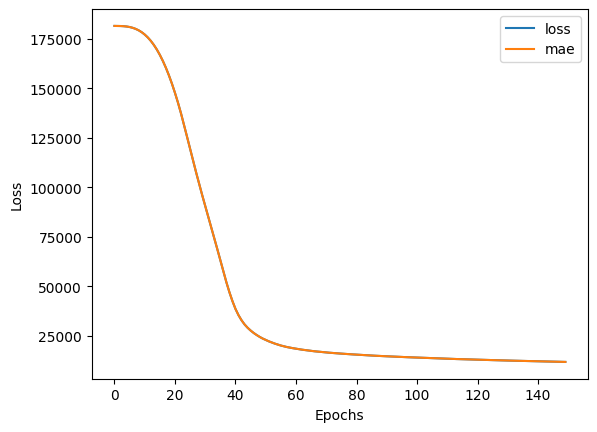

In [62]:
pd.DataFrame(history_2.history).plot()
plt.xlabel("Epochs")
plt.ylabel("Loss")

### Model_3

In [63]:
# Setting Random Seed
tf.random.set_seed(42)

# 1. Creating Model
price_prediction_3=tf.keras.Sequential(name='price_prediction_3')
price_prediction_3.add(tf.keras.layers.Dense(200,input_shape=[input_shape],activation='relu',name='layer1',kernel_initializer=tf.keras.initializers.lecun_normal))
price_prediction_3.add(tf.keras.layers.Dense(100,activation='relu',name='layer2',kernel_initializer=tf.keras.initializers.lecun_normal))
price_prediction_3.add(tf.keras.layers.Dense(50,activation='relu',name='layer3',kernel_initializer=tf.keras.initializers.lecun_normal))
price_prediction_3.add(tf.keras.layers.Dense(1,name='output_layer'))

# 2. Compile Model
price_prediction_3.compile(loss=tf.keras.losses.mae,
                           optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.001),
                           metrics=['mae'])
# 3. Get model summary
price_prediction_3.summary()

Model: "price_prediction_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer1 (Dense)              (None, 200)               25000     
                                                                 
 layer2 (Dense)              (None, 100)               20100     
                                                                 
 layer3 (Dense)              (None, 50)                5050      
                                                                 
 output_layer (Dense)        (None, 1)                 51        
                                                                 
Total params: 50,201
Trainable params: 50,201
Non-trainable params: 0
_________________________________________________________________


In [64]:
history_3=price_prediction_3.fit(X_train_norm,y_train,epochs=100,verbose=1)

Epoch 1/100
37/37 [==============================] - 3s 3ms/step - loss: 181406.5000 - mae: 181406.5000
Epoch 2/100
37/37 [==============================] - 0s 3ms/step - loss: 181177.8281 - mae: 181177.8281
Epoch 3/100
37/37 [==============================] - 0s 3ms/step - loss: 180578.0000 - mae: 180578.0000
Epoch 4/100
37/37 [==============================] - 0s 3ms/step - loss: 179380.4688 - mae: 179380.4688
Epoch 5/100
37/37 [==============================] - 0s 3ms/step - loss: 177314.4219 - mae: 177314.4219
Epoch 6/100
37/37 [==============================] - 0s 3ms/step - loss: 174082.8281 - mae: 174082.8281
Epoch 7/100
37/37 [==============================] - 0s 3ms/step - loss: 169320.4219 - mae: 169320.4219
Epoch 8/100
37/37 [==============================] - 0s 3ms/step - loss: 162677.2969 - mae: 162677.2969
Epoch 9/100
37/37 [==============================] - 0s 3ms/step - loss: 153723.1562 - mae: 153723.1562
Epoch 10/100
37/37 [==============================] - 0s 3ms/ste

In [65]:
price_prediction_3.evaluate(X_test_norm,y_test)

10/10 [==============================] - 0s 2ms/step - loss: 18156.6836 - mae: 18156.6836


[18156.68359375, 18156.68359375]

In [66]:
y_pred_3=price_prediction_2.predict(X_test_norm[:20])
print(f' True Price: {y_test[:20]}\nPredicted Price: {tf.squeeze(y_pred_3)}')

1/1 [==============================] - 0s 56ms/step
 True Price: 892     154500
1105    325000
413     115000
522     159000
1036    315500
614      75500
218     311500
1160    146000
649      84500
887     135500
576     145000
1252    130000
1061     81000
567     214000
1108    181000
1113    134500
168     183500
1102    135000
1120    118400
67      226000
Name: SalePrice, dtype: int64
Predicted Price: [154854.89 328281.7  104548.32 169559.55 347517.5   73153.6  227945.23
 159758.98  72184.74 117675.06 141974.12 130546.35 128108.22 220525.31
 171722.19 138631.97 190333.86 131984.3  122605.23 205509.48]


Text(0, 0.5, 'Loss')

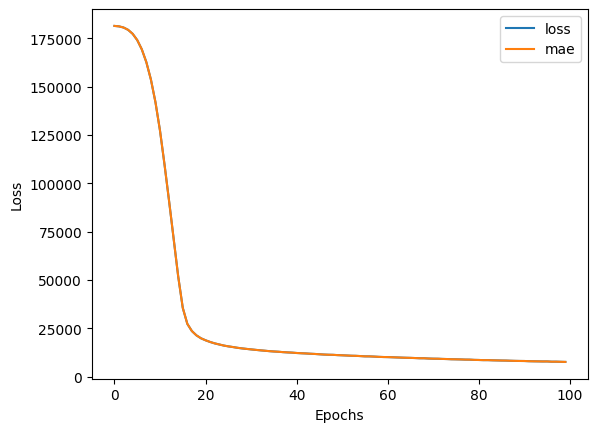

In [67]:
pd.DataFrame(history_3.history).plot()
plt.xlabel("Epochs")
plt.ylabel("Loss")

### Submitting Testing Data To Kaggle

In [68]:
test_data=pd.read_csv("https://raw.githubusercontent.com/JayantArsode/Machine_Learning/Machine-Learning/House-Prices-Advanced-Regression-Techniques/Boston_House_Price_Dataset_Files/test.csv")
test_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [69]:
temp_column=boston_house_data_selected_columns.copy()
temp_column.remove('SalePrice')
temp_column.insert(0,'Id')
test_data=test_data[temp_column]
test_data.head()

,Id,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,TotalBsmtSF,1stFlrSF,GrLivArea,Fireplaces,FullBath,...,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,1461,5,1961,1961,0.0,882.0,896,896,0,1,...,SBrkr,TA,Typ,Attchd,Unf,TA,TA,Y,WD,Normal
1,1462,6,1958,1958,108.0,1329.0,1329,1329,0,1,...,SBrkr,Gd,Typ,Attchd,Unf,TA,TA,Y,WD,Normal
2,1463,5,1997,1998,0.0,928.0,928,1629,1,2,...,SBrkr,TA,Typ,Attchd,Fin,TA,TA,Y,WD,Normal
3,1464,6,1998,1998,20.0,926.0,926,1604,1,2,...,SBrkr,Gd,Typ,Attchd,Fin,TA,TA,Y,WD,Normal
4,1465,8,1992,1992,0.0,1280.0,1280,1280,0,2,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal


In [70]:
test_data_preprocessed=data_preprocesses(test_data.drop(columns=['Id']),numerical_columns[:13])
test_data_preprocessed.columns[test_data_preprocessed.isna().any()]

Index([], dtype='object')

In [44]:
test_data_norm=data_preprocessing_pipeline.transform(test_data_preprocessed)

In [75]:
test_data['SalePrice']=price_prediction_3.predict(test_data_norm)
test_data.head()

46/46 [==============================] - 0s 2ms/step


,Id,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,TotalBsmtSF,1stFlrSF,GrLivArea,Fireplaces,FullBath,...,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition,SalePrice
0,1461,5,1961,1961,0.0,882.0,896,896,0,1,...,TA,Typ,Attchd,Unf,TA,TA,Y,WD,Normal,121310.085938
1,1462,6,1958,1958,108.0,1329.0,1329,1329,0,1,...,Gd,Typ,Attchd,Unf,TA,TA,Y,WD,Normal,152161.046875
2,1463,5,1997,1998,0.0,928.0,928,1629,1,2,...,TA,Typ,Attchd,Fin,TA,TA,Y,WD,Normal,178850.609375
3,1464,6,1998,1998,20.0,926.0,926,1604,1,2,...,Gd,Typ,Attchd,Fin,TA,TA,Y,WD,Normal,180328.953125
4,1465,8,1992,1992,0.0,1280.0,1280,1280,0,2,...,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal,192428.000000


In [76]:
submission=pd.DataFrame([])
submission['Id']=test_data['Id']
submission['SalePrice']=test_data['SalePrice']
submission.to_csv('submission_model_3.csv',index=False)

### Conclusion:

> <h3> Scores <h3>
<img src='https://github.com/JayantArsode/Machine_Learning/blob/Machine-Learning/House-Prices-Advanced-Regression-Techniques/Score_On_Kaggle_Screenshot/Submission.png?raw=true'>

> <h3> Ranking <h3>
<img src='https://github.com/JayantArsode/Machine_Learning/blob/Machine-Learning/House-Prices-Advanced-Regression-Techniques/Score_On_Kaggle_Screenshot/ranking.png?raw=true'>

### From Above We Can Conclude that `price_prediction_model_3` performed best.